In [123]:
import math
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.image as mpimg
import plotly.graph_objects as go
import mplcursors
import seaborn as sns

In [211]:
#work laptop
# ruh_m = plt.imread('C:\\Users\\adhrit\\Documents\\Python\\amzn_mapping_proj\\HOU8_imageFlip.png')
# df = pd.read_csv("C:\\Users\\adhrit\\Documents\\Python\\amzn_mapping_proj\\exampleDataPoints.csv")

#home laptop 
ruh_m = plt.imread('C:\\Users\\adhri\\OneDrive\\Documents\\Python\\amzn_FC_mapping\\HOU8_imageFlip.png')
df = pd.read_csv("C:\\Users\\adhri\\OneDrive\\Documents\\Python\\amzn_FC_mapping\\exampleDataPoints.csv")

<IPython.core.display.Javascript object>


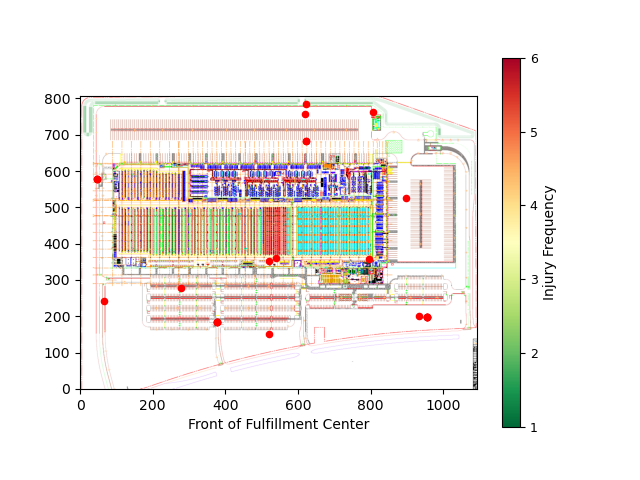

<ipython-input-62-6ffe27d6de89>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["%d"%v for v in tick_values], fontsize=9)


Text(0, 0.5, '')

In [62]:
xFreq = df["x"].value_counts()
ax = df.plot(kind = "scatter", x=0, y=1, c="r", cmap="RdYlGn")
plt.imshow(ruh_m, origin='lower')

#set tick values for the colorbar
tick_values = np.linspace(start=min(xFreq), stop=max(xFreq)+1, num=6)

#color bar info
cbar = plt.colorbar()
cbar.solids.set_cmap("RdYlGn_r")
cbar.ax.set_yticklabels(["%d"%v for v in tick_values], fontsize=9)
cbar.set_label('Injury Frequency', fontsize=10)


plt.xlabel("Front of Fulfillment Center")
plt.ylabel("")

#plt.savefig('prototype.png')

<IPython.core.display.Javascript object>


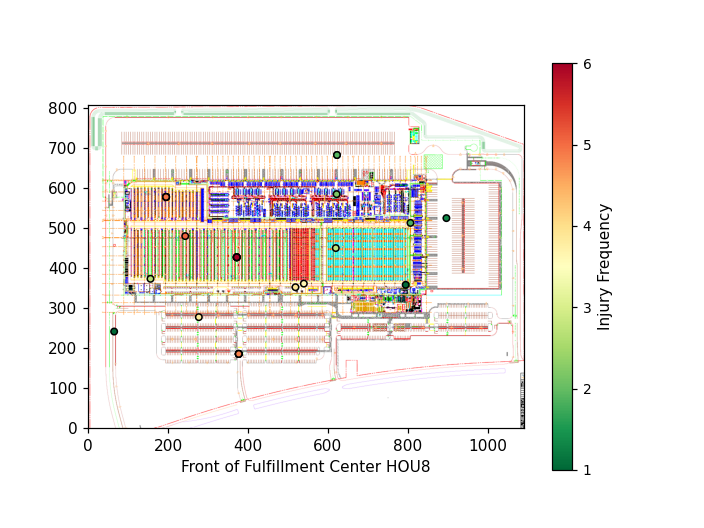

<ipython-input-212-86cf32997db1>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["%d"%v for v in tick_values], fontsize=9)


In [212]:
xy = np.vstack([df["x"],df["y"]])
z = gaussian_kde(xy)(xy)

# print(xy)
# print(z)

fig, ax = plt.subplots()
ax.scatter(df["x"], df["y"], c=z, cmap="RdYlGn_r", edgecolor="k", s = 18)
plt.imshow(ruh_m, origin='lower')


#set tick values for the colorbar
tick_values = np.linspace(start=min(xFreq), stop=max(xFreq)+1, num=6)

#color bar info
cbar = plt.colorbar()
cbar.solids.set_cmap("RdYlGn_r")
cbar.ax.set_yticklabels(["%d"%v for v in tick_values], fontsize=9)
cbar.set_label('Injury Frequency', fontsize=10)


plt.xlabel("Front of Fulfillment Center HOU8")
plt.ylabel("")

plt.savefig('HOU8_Injury_Freq.png')

<IPython.core.display.Javascript object>


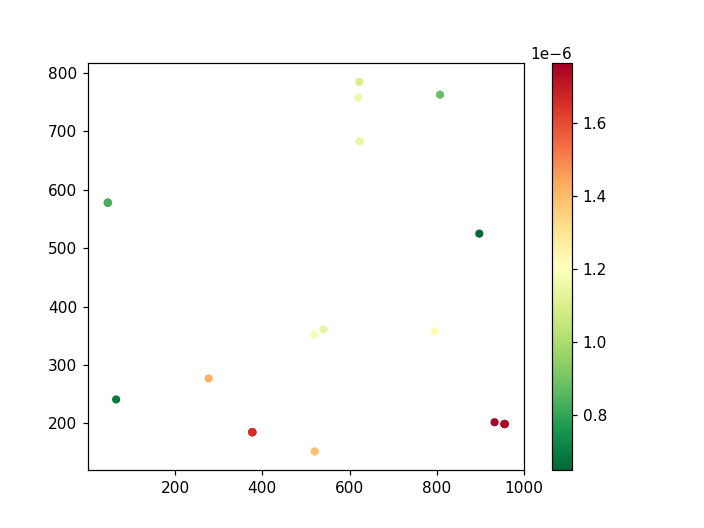

In [140]:
fig, ax0 = plt.subplots()

im0 = plt.scatter(df["x"], df["y"],s=19,c=z, cmap='RdYlGn_r')

cbar = fig.colorbar(im0,ax=ax0)


955    5
377    4
46     3
623    2
622    1
897    1
932    1
807    1
520    1
65     1
519    1
277    1
620    1
795    1
540    1
Name: x, dtype: int64
[897, 65, 932, 955, 807, 519, 520, 620, 46, 623, 622, 277, 377, 795, 540]
[352, 578, 358, 199, 361, 202, 683, 525, 785, 241, 277, 758, 152, 185, 763]
['y', 'x']


<IPython.core.display.Javascript object>


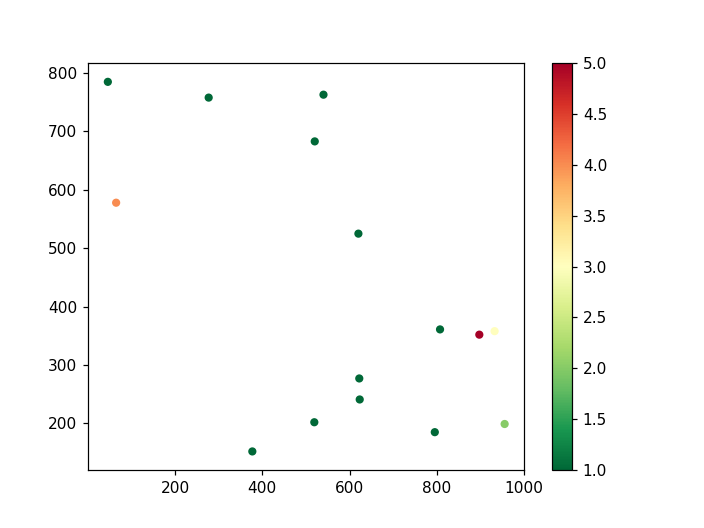

In [159]:
# for item in df.index:
#     if df["x"]
print(xFreq)
test_listx = list(set(df["x"]))
print(test_listx)
test_listy = list(set(df["y"]))
print(test_listy)

test_listTot = list(set(df))
print(test_listTot)


# res = []
# [res.append(x) for x in test_list if x not in res]
# print(res)


# for item in df.index:
#     if item[0] == 


fig, ax0 = plt.subplots()

im0 = plt.scatter(x=test_listx, y=test_listy, s=19,c=xFreq, cmap='RdYlGn_r')
#im0 = plt.scatter(x=mergedCoord[0], y=mergedCoord[1], s=19,c=totFreq, cmap='RdYlGn_r')
#mergedCoord is merged list of df['x'] and df['y'] and totFreq is mergedCoord.value_counts()


cbar = fig.colorbar(im0,ax=ax0)


In [172]:
exmpl = [[1,2],[3,4]]
print(exmpl[1][0])

exmpl2 = [[795,358],[46,578],[795,358],[795,358],[795,358],[807,763]]
print(exmpl2[0])
print(exmpl2[1][0])

res = []
[res.append(x) for x in exmpl2 if x not in res]
print(res)

3
[795, 358]
46
[[795, 358], [46, 578], [807, 763]]


In [182]:
for x in xFreq.index:
    print(x)

955
377
46
623
622
897
932
807
520
65
519
277
620
795
540
